In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print(tf.__version__)

2.4.1


In [61]:
train_norm = pd.read_csv('../data/train_norm.csv')
test_norm = pd.read_csv('../data/test_norm.csv')

train = pd.read_csv('../data/train_data.csv')
test = pd.read_csv('../data/test_data.csv')

In [62]:
train.shape
test.shape
train_norm.shape
test_norm.shape

(21000, 13)

(9000, 12)

(21000, 109)

(9000, 109)

In [63]:
train_norm.columns

Index(['Unnamed: 0', 'position', 'age', 'sex', 'partner', 'num_child',
       'education', 'service_length', 'study_time', 'commute',
       ...
       'agelayer_and_position_0_2', 'agelayer_and_position_1_0',
       'agelayer_and_position_1_1', 'agelayer_and_position_1_2',
       'agelayer_and_position_1_3', 'agelayer_and_position_2_0',
       'agelayer_and_position_2_1', 'agelayer_and_position_2_2',
       'agelayer_and_position_2_3', 'agelayer_and_position_2_4'],
      dtype='object', length=109)

In [64]:
train_norm.drop(columns='Unnamed: 0', inplace=True)
test_norm.drop(columns='Unnamed: 0', inplace=True)
train_norm.head()
test_norm.head()

,position,age,sex,partner,num_child,education,service_length,study_time,commute,overtime,...,agelayer_and_position_0_2,agelayer_and_position_1_0,agelayer_and_position_1_1,agelayer_and_position_1_2,agelayer_and_position_1_3,agelayer_and_position_2_0,agelayer_and_position_2_1,agelayer_and_position_2_2,agelayer_and_position_2_3,agelayer_and_position_2_4
0,-0.185238,1.014212,1.003315,1.001310,0.705723,-0.088298,1.093489,-0.551922,0.250411,-0.580611,...,-0.030875,-0.751145,-0.291813,-0.137017,-0.028463,-0.011953,2.738917,-0.524583,-0.342076,-0.243994
1,0.631301,-0.199013,-0.996648,-0.998644,-0.705252,-0.984070,0.065146,1.561014,0.525330,0.020443,...,-0.030875,-0.751145,-0.291813,-0.137017,-0.028463,-0.011953,-0.365090,1.906185,-0.342076,-0.243994
2,0.631301,0.267612,-0.996648,-0.998644,-0.705252,0.807475,0.158632,0.051774,-0.299425,0.865676,...,-0.030875,-0.751145,-0.291813,-0.137017,-0.028463,-0.011953,-0.365090,1.906185,-0.342076,-0.243994
3,-1.001776,-1.038938,1.003315,-0.998644,-0.705252,-0.984070,-0.776225,-0.250074,-1.399099,-1.162883,...,-0.030875,1.331237,-0.291813,-0.137017,-0.028463,-0.011953,-0.365090,-0.524583,-0.342076,-0.243994
4,-1.001776,-0.758963,1.003315,-0.998644,-0.705252,-0.088298,-0.682739,-0.250074,-0.849262,-1.388278,...,-0.030875,1.331237,-0.291813,-0.137017,-0.028463,-0.011953,-0.365090,-0.524583,-0.342076,-0.243994


,position,age,sex,partner,num_child,education,service_length,study_time,commute,overtime,...,agelayer_and_position_0_2,agelayer_and_position_1_0,agelayer_and_position_1_1,agelayer_and_position_1_2,agelayer_and_position_1_3,agelayer_and_position_2_0,agelayer_and_position_2_1,agelayer_and_position_2_2,agelayer_and_position_2_3,agelayer_and_position_2_4
0,1.499887,0.566331,1.022418,0.992638,2.844446,-0.080373,0.641100,-0.804253,0.826414,1.103082,...,-0.031637,-0.776575,-0.281986,-0.138329,-0.027898,-0.014908,-0.363402,-0.52882,3.003543,-0.229939
1,-0.155617,-0.181027,-0.977965,-1.007304,-0.712198,2.615369,-1.134887,-1.108165,-0.004509,1.968836,...,-0.031637,-0.776575,-0.281986,-0.138329,-0.027898,-0.014908,2.751470,-0.52882,-0.332903,-0.229939
2,-0.983369,-1.208643,1.022418,0.992638,0.710459,-0.978954,-0.947941,-0.500341,-0.835431,-1.238389,...,-0.031637,-0.776575,-0.281986,-0.138329,-0.027898,-0.014908,-0.363402,-0.52882,-0.332903,-0.229939
3,-0.983369,-0.461286,1.022418,-1.007304,-0.712198,-0.978954,-0.200157,-0.196428,-0.558457,-0.116844,...,-0.031637,1.287563,-0.281986,-0.138329,-0.027898,-0.014908,-0.363402,-0.52882,-0.332903,-0.229939
4,-0.155617,0.753170,1.022418,-1.007304,-0.712198,-0.978954,1.014992,-0.196428,-0.004509,0.296357,...,-0.031637,-0.776575,-0.281986,-0.138329,-0.027898,-0.014908,2.751470,-0.52882,-0.332903,-0.229939


In [65]:
for col in train_norm.columns:
    if train_norm[col].dtypes == 'int64':
        print(train_norm[col])

In [66]:
target_col = 'salary'
target = train[target_col]
train.drop(columns=[target_col], inplace=True)

In [67]:
drop_cols = ['id']
train.drop(columns=drop_cols, inplace=True)
test.drop(columns=drop_cols, inplace=True)

In [68]:
target = target.to_numpy()


In [69]:
target = np.reshape(target, (-1, 1))
target

array([[428.07488729],
       [317.93051704],
       [357.35031585],
       ...,
       [364.38673606],
       [235.68644917],
       [265.06183816]])

In [70]:
target.shape

(21000, 1)

In [71]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
target = ss.fit_transform(target)
# target = np.log1p(target)

In [72]:
x_train = train_norm.values
# y_train = target.values
test_set = test_norm.values

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_train, target, test_size=0.2, random_state=42)


In [74]:
type(X_train)
X_train

numpy.ndarray

array([[ 0.63130104,  1.29418681, -0.99664847, ...,  1.9061854 ,
        -0.34207558, -0.24399383],
       [ 0.63130104,  0.64091173, -0.99664847, ...,  1.9061854 ,
        -0.34207558, -0.24399383],
       [-0.18523763,  0.26761169, -0.99664847, ..., -0.52458296,
        -0.34207558, -0.24399383],
       ...,
       [ 0.63130104, -0.29233837,  1.00331502, ..., -0.52458296,
        -0.34207558, -0.24399383],
       [-1.0017763 , -1.13226347,  1.00331502, ..., -0.52458296,
        -0.34207558, -0.24399383],
       [ 0.63130104,  1.01421178,  1.00331502, ...,  1.9061854 ,
        -0.34207558, -0.24399383]])

In [75]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape



(16800, 108)

(4200, 108)

(16800, 1)

(4200, 1)

In [91]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

def build_model():
    #モデルの初期化
    model = Sequential()
    #層の構築
    model.add(Dense(32, activation='relu'))
    #     model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
#     model.add(Dense(108, activation='relu'))
    #     model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #     model.add(Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]))
    #     model.add(Dense(64, activation='relu'))
    #     model.add(Dense(1))
    #モデルの構築

    #     optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer='Adam',
                metrics=['mae', 'mse'])
    # model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics='acc')
    # model.compile(optimizer='rmsprop',
    #               loss='mse')

    return model

In [92]:
model = build_model()
#モデルの構造を表示
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [93]:
ex_batch = x_train[:10]
ex_result = model.predict(ex_batch)
ex_result

array([[0.18048862],
       [0.4414909 ],
       [0.24170506],
       [0.59238034],
       [0.43069747],
       [0.28604895],
       [0.2502364 ],
       [0.6037677 ],
       [0.47691068],
       [0.56031203]], dtype=float32)

In [94]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 10 == 0:
            print(epoch,"/1000")
            print(logs)

In [98]:
EPOCHS = 1000
log = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=128,verbose=0, validation_data=(X_test,y_test),
                callbacks=[PrintDot(), EarlyStopping(monitor='val_loss',min_delta=0,patience=150,verbose=1)],
                validation_split=0.3)

0 /1000
{'loss': 0.5278143286705017, 'mae': 0.5706011652946472, 'mse': 0.5278143286705017, 'val_loss': 0.5524806380271912, 'val_mae': 0.6016878485679626, 'val_mse': 0.5524806380271912}
10 /1000
{'loss': 0.5209048986434937, 'mae': 0.5593225955963135, 'mse': 0.5209048986434937, 'val_loss': 0.548155665397644, 'val_mae': 0.599312424659729, 'val_mse': 0.548155665397644}
20 /1000
{'loss': 0.5204826593399048, 'mae': 0.5583460927009583, 'mse': 0.5204826593399048, 'val_loss': 0.5482189655303955, 'val_mae': 0.5990381240844727, 'val_mse': 0.5482189655303955}
30 /1000
{'loss': 0.520514726638794, 'mae': 0.5578665733337402, 'mse': 0.520514726638794, 'val_loss': 0.5476809144020081, 'val_mae': 0.5988441109657288, 'val_mse': 0.5476809144020081}
40 /1000
{'loss': 0.5201076865196228, 'mae': 0.5571907758712769, 'mse': 0.5201076865196228, 'val_loss': 0.5459234118461609, 'val_mae': 0.5975701212882996, 'val_mse': 0.5459234118461609}
50 /1000
{'loss': 0.5198169350624084, 'mae': 0.5562300086021423, 'mse': 0.51

In [99]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                3488      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 4,577
Trainable params: 4,577
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

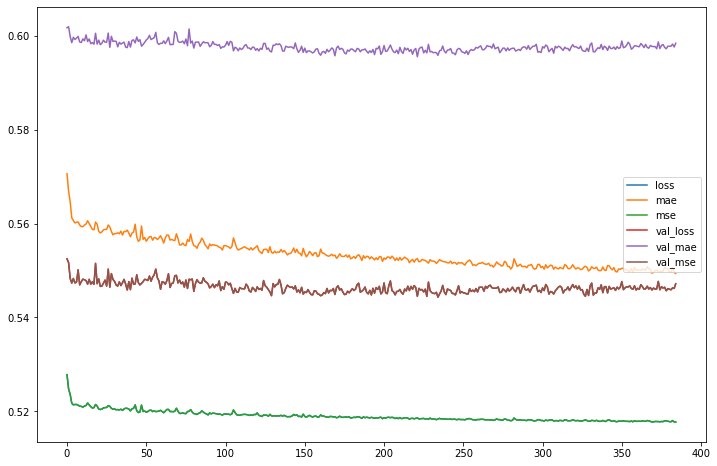

In [100]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [101]:
from sklearn import metrics
y_pred = model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('VarScore:', metrics.explained_variance_score(y_test, y_pred))

MAE: 0.5867563020110611
MSE: 0.5374771198150506
RMSE: 0.7331283106080754
VarScore: 0.5213600198067576


In [56]:
submit = model.predict(test_norm)

In [59]:
id_data = pd.DataFrame(test['id'])
# submitt_data = pd.concat([id_data,submitt_data], axis=1)
# submitt_data

KeyError: 'id'

In [19]:
train.shape
test.shape

(21000, 11)

(9000, 11)

In [28]:
log = pd.DataFrame(log)

,loss,mae,mse,val_loss,val_mae,val_mse
0,157327.171875,358.328979,157327.171875,163483.15625,364.465851,163483.15625
1,157327.125000,358.329102,157327.125000,163483.15625,364.465851,163483.15625
2,157327.140625,358.329010,157327.140625,163483.15625,364.465851,163483.15625
3,157327.203125,358.328857,157327.203125,163483.15625,364.465851,163483.15625
4,157327.156250,358.329254,157327.156250,163483.15625,364.465851,163483.15625
...,...,...,...,...,...,...
96,157327.125000,358.329285,157327.125000,163483.15625,364.465851,163483.15625
97,157327.093750,358.329041,157327.093750,163483.15625,364.465851,163483.15625
98,157327.140625,358.329041,157327.140625,163483.15625,364.465851,163483.15625
99,157327.125000,358.328857,157327.125000,163483.15625,364.465851,163483.15625


ValueError: x and y must have same first dimension, but have shapes (150,) and (101,)

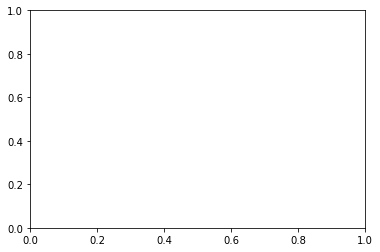

In [32]:
def plot_graph(values1, values2, rng, label1, label2):
    plt.plot(range(rng), values1, label=label1)
    plt.plot(range(rng), values2, label=label2)
    plt.legend()
    plt.grid()
    plt.show()


t_losses = log['loss']
t_mae = log['mae']
t_mse = log['mse']
v_losses = log['val_loss']
v_mae = log['val_mae']
v_mae = log['val_mse']

plot_graph(t_losses, v_losses, 150, 'loss(train)', 'loss(validate)')

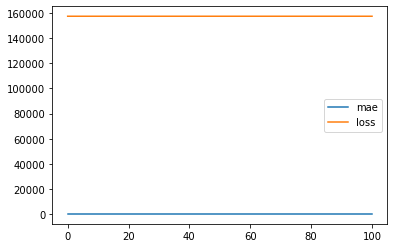

In [36]:
plt.plot(log['mae'], label='mae')
plt.plot(log['loss'], label='loss')
plt.legend()
plt.show()

In [34]:
log['loss']

0      157327.171875
1      157327.125000
2      157327.140625
3      157327.203125
4      157327.156250
           ...      
96     157327.125000
97     157327.093750
98     157327.140625
99     157327.125000
100    157327.015625
Name: loss, Length: 101, dtype: float64

In [120]:
import tensorflow as tf  # ライブラリ「TensorFlow」のtensorflowパッケージをインポート
from tensorflow.keras import layers    # レイヤー関連モジュールのインポート
from IPython.display import Image

# 定数（モデル定義時に必要となるもの）
INPUT_FEATURES = 108    # 入力（特徴）の数： 2（＝X座標とY座標）
LAYER1_NEURONS = 64    # ニューロンの数： 4
LAYER2_NEURONS = 32    # ニューロンの数： 3
OUTPUT_RESULTS = 1    # 出力結果の数： 1（＝結果は基本的に「-1.0」～「1.0」の数値）

# 変数（モデル定義時に必要となるもの）
activation1 = layers.Activation('relu' # 活性化関数（隠れ層用）： tanh関数（変更可能）
    , name='activation1'               # 名前付け
    )
activation2 = layers.Activation('relu' # 活性化関数（隠れ層用）： tanh関数（変更可能）
    , name='activation2'               
    )
acti_out = layers.Activation('linear'  # 活性化関数（出力層用）： 恒等関数（固定）
    , name='acti_out'                  
    )

# tf.keras.Modelによるモデルの定義
class NeuralNetwork(tf.keras.Model):

  # ### レイヤーを定義 ###
  def __init__(self):
    super(NeuralNetwork, self).__init__()

    # 入力層は定義「不要」。実際の入力によって決まるので

    # 隠れ層：1つ目のレイヤー（layer）
    self.layer1 = layers.Dense(    # 全結合層（線形変換）
      #input_shape=(INPUT_FEATURES,),  # 入力層（定義不要）
      LAYER1_NEURONS,              # 次のレイヤーへの出力ユニット数
      name='layer1')

    # 隠れ層：2つ目のレイヤー（layer）
    self.layer2 = layers.Dense(    # 全結合層
      LAYER2_NEURONS,              # 次のレイヤーへの出力ユニット数
      name='layer2')

    # 出力層
    self.layer_out = layers.Dense( # 全結合層
      OUTPUT_RESULTS,              # 出力結果への出力ユニット数
      name='layer_out')

  # ### フォワードパスを定義 ###
  def call(self, inputs, training=None):   # 入力と、訓練／評価モード
    # 「出力＝活性化関数（第n層（入力））」の形式で記述
    x1 = activation1(self.layer1(inputs))  # 活性化関数は変数として定義
    x2 = activation2(self.layer2(x1))      # 同上
    outputs = acti_out(self.layer_out(x2)) # そのまま出力（＝「恒等関数」）
    return outputs

  # モデル内容の出力を行う独自メソッド
    def get_functional_model(self):
        x = layers.Input(shape=(INPUT_FEATURES,), name='input_features')
        static_model = tf.keras.Model(inputs=[x], outputs=self.call(x)) 
        return static_model

In [121]:
# モデル（NeuralNetworkクラス）のインスタンス化
model = NeuralNetwork()
f_model = model.get_functional_model()
f_model.summary() # モデルの内容を出力

AttributeError: 'NeuralNetwork' object has no attribute 'get_functional_model'